<img src="../imagens/slide02.png">


**Sobre os dados explorados:**

A partir da planilha original os dados foram divididos em 3 arquivos e pré processados [nesse Notebook](https://github.com/DeixeViver/eko-dados/blob/master/Notebooks/preprocessando_indicadores_cnd.ipynb) resultando nos arquivos abaixo:

- cnd_violacao.csv que tem os dados sobre a quantidade de denúncias por tempo e tipo de violação.
- cnd_idioma.csv que tem os dados sobre a quantidade de denúncias por tempo e idioma.
- cnd_dominio.csv que tem os dados sobre a quantidade de denúncias por tempo e domínio da página denunciada. Os domínios estão mascarados por uma questão de segurança e estão nesse formato desde o arquivo original recebido. A máscara aplicada permite que nós vejamos apenas os "radicais" dos sites e isso é o suficiente para analisar, por exemplo quais os domínios com maior quantidade de denúncia.

**indicadores_cnd_violacao.csv:**
- 'Violação': Tipo de violação denunciada *(Apologia e Incitação a crimes contra a Vida, Homofobia, Intolerância Religiosa, Maus Tratos Contra Animais, Neo Nazismo, Não classificado, Pornografia Infantil, Racismo, Tráfico de Pessoas, Violência ou Discriminação contra Mulheres e Xenofobia)*
- 'Total': Total de todas as denúncias independente se foram duplicadas ou não.
- 'Mês': Nome mês referente ao período da denúncia.
- 'Mês Número': Número do mês referente ao período da denúncia.
- 'Ano': Ano referente ao período da denúncia.

**indicadores_cnd_idioma.csv:**
- 'Idioma': Idioma da página denunciada *(dutch, english, farsi, french, german, pinyin, portuguese, russian, spanish, swedish)*.
- 'Total': Total de todas as denúncias independente se foram duplicadas ou não.
- 'Mês': Nome mês referente ao período da denúncia.
- 'Mês Número': Número do mês referente ao período da denúncia.
- 'Ano': Ano referente ao período da denúncia.

**indicadores_cnd_dominio.csv:**
- 'Domínio': Parte do endereço da página denunciada *(facebook.com, google.com.br, imgsrc.ru, instagram.com, orkut.com, orkut.com.br, twitter.com, uol.com.br, xvideos.com, youtube.com)*.
- 'Total': Total de todas as denúncias independente se foram duplicadas ou não.
- 'Mês': Nome mês referente ao período da denúncia.
- 'Mês Número': Número do mês referente ao período da denúncia.
- 'Ano': Ano referente ao período da denúncia.

**Sobre as bibliotecas**

Como falamos antes bibliotecas são algoritmos que outras pessoas fizeram e deixaram disponíveis para que outros pudessem reusar ❤ 

**[Matplotlib](https://matplotlib.org/)** - É uma biblioteca para visualização de dados. Ela tem integração direta com o Pandas e isso vai facilitar muito a nossa vida.

**[Pandas](https://pandas.pydata.org/)** - É uma biblioteca para manipulação e análise de dados em Python.
Permite que a gente importe arquivos, agrupe dados, calcule médias entre muitas muuuitas outras coisas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

A seguir algumas configurações para que as figuras que vamos gerar apareçam normalmente.

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 9)

### 2 - Importando os dados

In [3]:
violacao = pd.read_csv('../dados/indicadores_cnd_violacao_preprocessado.csv')
violacao.head(3)

,Violação,Únicas,Duplicadas,Total de Denúncias,Mês,Mês Número,Ano
0,Não classificado,0.0,0.0,0,Janeiro,1,2006
1,Homofobia,2.0,0.0,2,Janeiro,1,2006
2,Neo Nazismo,7.0,1.0,8,Janeiro,1,2006


In [4]:
idioma = pd.read_csv('../dados/indicadores_cnd_idioma_preprocessado.csv')
idioma.head(3)

,Idioma,Únicas,Duplicadas,Total de Denúncias,Mês,Mês Número,Ano
0,portuguese,55.0,1.0,56,Janeiro,1,2006
1,french,10.0,0.0,10,Janeiro,1,2006
2,farsi,3.0,0.0,3,Janeiro,1,2006


In [5]:
dominio = pd.read_csv('../dados/indicadores_cnd_dominio_preprocessado.csv')
dominio.head(3)

,Domínio,Únicas,Duplicadas,Total de Denúncias,Mês,Mês Número,Ano
0,geocities.com,13.0,0.0,13,Janeiro,1,2006
1,yahoo.com,4.0,0.0,4,Janeiro,1,2006
2,freepichosting.info,11.0,0.0,11,Janeiro,1,2006


In [6]:
violacao.Ano = violacao.Ano.astype(object)
violacao['Mês Número'] = violacao['Mês Número'].astype(object)
violacao.dtypes

Violação               object
Únicas                float64
Duplicadas            float64
Total de Denúncias      int64
Mês                    object
Mês Número             object
Ano                    object
dtype: object

## 3 - Saindo do Dados e chegando em Informações

### 3.1 - Quais são os tipos de violações nas denúncias em 2018?

In [7]:
violacao_agrupada_ano = violacao.groupby(['Ano', 'Violação']).sum().reset_index()
violacao_agrupada_ano.head(5)

,Ano,Violação,Únicas,Duplicadas,Total de Denúncias
0,2006,Apologia e Incitação a crimes contra a Vida,9829.0,59353.0,69182
1,2006,Homofobia,1772.0,18320.0,20092
2,2006,Intolerância Religiosa,2230.0,25499.0,27729
3,2006,Maus Tratos Contra Animais,2854.0,52669.0,55523
4,2006,Neo Nazismo,3454.0,29463.0,32917


In [8]:
violacao_2018 = violacao_agrupada_ano.loc[violacao_agrupada_ano['Ano'] == 2018].sort_values('Total de Denúncias')
violacao_2018

,Ano,Violação,Únicas,Duplicadas,Total de Denúncias
137,2018,Não classificado,9.0,12.0,21
140,2018,Tráfico de Pessoas,288.0,245.0,533
134,2018,Intolerância Religiosa,698.0,404.0,1102
135,2018,Maus Tratos Contra Animais,439.0,720.0,1159
136,2018,Neo Nazismo,972.0,3296.0,4268
133,2018,Homofobia,1581.0,2731.0,4312
139,2018,Racismo,3159.0,5307.0,8466
142,2018,Xenofobia,6846.0,3040.0,9886
141,2018,Violência ou Discriminação contra Mulheres,3731.0,13319.0,17050
132,2018,Apologia e Incitação a crimes contra a Vida,7510.0,20514.0,28024


In [9]:
t = violacao.groupby(['Ano', 'Mês', 'Violação']).sum().reset_index()
t.loc[t['Ano'] == 2018]

,Ano,Mês,Violação,Únicas,Duplicadas,Total de Denúncias
1584,2018,Abril,Apologia e Incitação a crimes contra a Vida,361.0,180.0,541
1585,2018,Abril,Homofobia,36.0,44.0,80
1586,2018,Abril,Intolerância Religiosa,40.0,19.0,59
1587,2018,Abril,Maus Tratos Contra Animais,67.0,200.0,267
1588,2018,Abril,Neo Nazismo,59.0,60.0,119
1589,2018,Abril,Não classificado,0.0,0.0,0
1590,2018,Abril,Pornografia Infantil,2177.0,1922.0,4099
1591,2018,Abril,Racismo,126.0,85.0,211
1592,2018,Abril,Tráfico de Pessoas,14.0,12.0,26
1593,2018,Abril,Violência ou Discriminação contra Mulheres,196.0,154.0,350


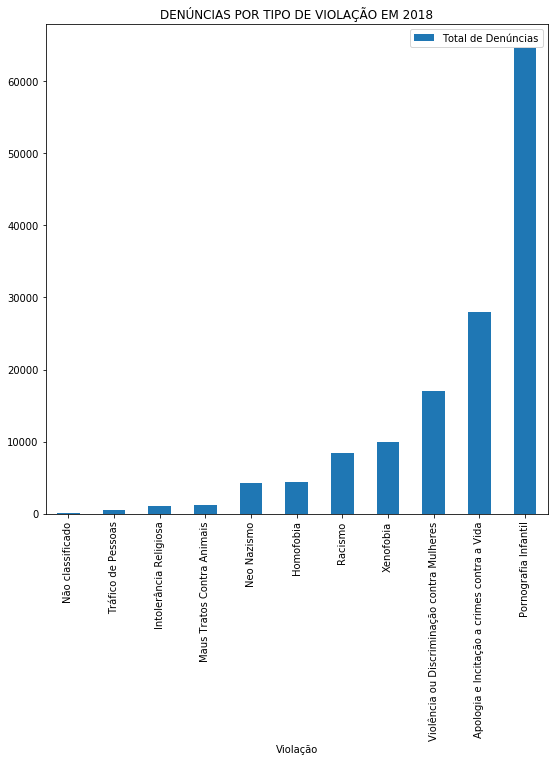

In [10]:
violacao_2018.plot.bar(x = 'Violação', y = 'Total de Denúncias',  
                       title='DENÚNCIAS POR TIPO DE VIOLAÇÃO EM 2018')

In [11]:
violacao_agrupada_ano.to_csv('../dados/violacao_agrupado_ano.csv', index=False)


### 3.2 - Quais são os domínios das páginas denunciadas em 2018?



In [12]:
dominio_agrupado_ano = dominio.groupby(['Ano', 'Domínio']).sum().reset_index()
dominio_agrupado_ano.head()

,Ano,Domínio,Únicas,Duplicadas,Total de Denúncias,Mês Número
0,2006,0bbs.jp,4.0,0.0,4,5
1,2006,3.122,19.0,4.0,23,12
2,2006,c700.com,5.0,7.0,12,7
3,2006,coredump.cx,17.0,0.0,17,1
4,2006,cutelitt.com,18.0,9.0,27,21


In [13]:
dominio_2018 = dominio_agrupado_ano.loc[dominio_agrupado_ano['Ano'] == 2018].sort_values('Únicas')
dominio_2018

,Ano,Domínio,Únicas,Duplicadas,Total de Denúncias,Mês Número
428,2018,4shared.com,38.0,1.0,39,3
427,2018,155chan.top,39.0,62.0,101,5
440,2018,openload.co,42.0,4.0,46,3
444,2018,riodenojeira.xyz,43.0,1787.0,1830,6
439,2018,off-cams.com,44.0,8.0,52,9
435,2018,jpg4.club,44.0,2.0,46,12
430,2018,google.com,46.0,30.0,76,12
448,2018,vk.com,67.0,19.0,86,5
438,2018,nnhoney.com,78.0,2.0,80,10
449,2018,whatsapp.com,101.0,59.0,160,17


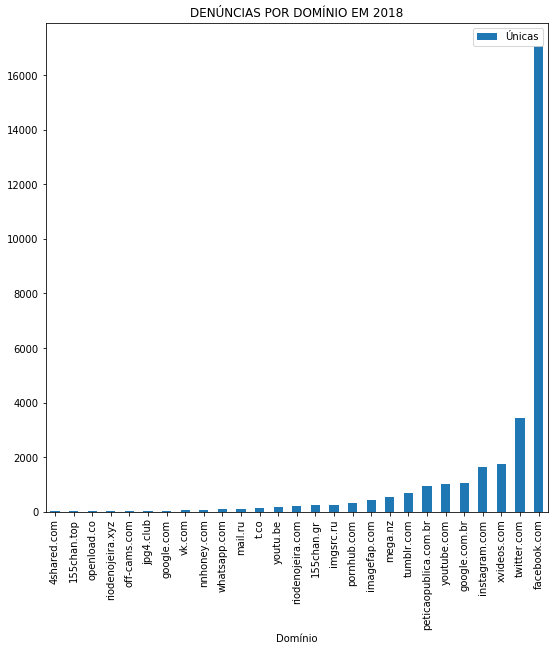

In [20]:
dominio_2018.plot.bar(x = 'Domínio', y = 'Únicas', title='DENÚNCIAS POR DOMÍNIO EM 2018')

In [15]:
dominio_agrupado_ano.to_csv('../dados/dominio_agrupado_ano.csv', index=False)

### 3.3 - Quais são os idiomas das páginas denunciadas em 2018?

In [16]:
idioma_agrupado_ano = idioma[['Total de Denúncias', 'Ano', 'Idioma']].groupby(['Ano', 'Idioma']).sum().reset_index()
idioma_agrupado_ano.head()

,Ano,Idioma,Total de Denúncias
0,2006,dutch,55
1,2006,english,7943
2,2006,farsi,9
3,2006,french,95
4,2006,german,12


In [17]:
idioma_2018 = idioma_agrupado_ano.loc[idioma_agrupado_ano['Ano'] == 2018].sort_values('Total de Denúncias')
idioma_2018

,Ano,Idioma,Total de Denúncias
125,2018,pinyin,5
129,2018,swedish,14
122,2018,farsi,29
120,2018,dutch,47
124,2018,german,104
128,2018,spanish,938
123,2018,french,2151
127,2018,russian,9652
126,2018,portuguese,28211
121,2018,english,46012


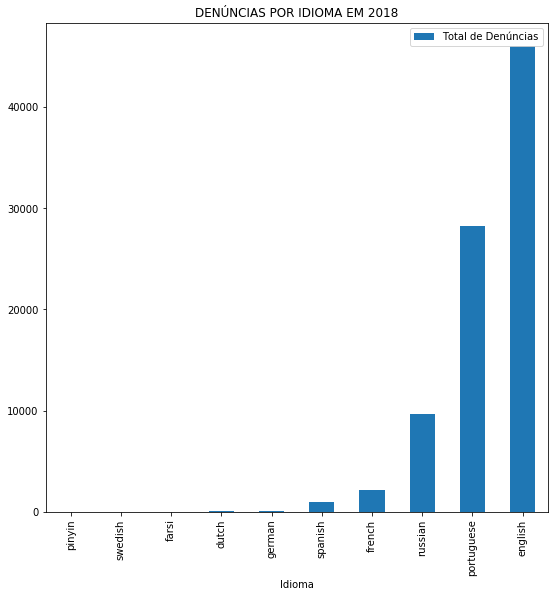

In [18]:
idioma_2018.plot.bar(x = 'Idioma', y = 'Total de Denúncias',  title='DENÚNCIAS POR IDIOMA EM 2018')

In [19]:
idioma_agrupado_ano.to_csv('../dados/idioma_agrupado_ano.csv', index=False)